Most up to date top_offender approach, level 1

In [15]:
# %load_ext autoreload
# %reload_ext autoreload
# %autoreload 2

In [16]:
import os
os.chdir('C:\\Users\\WDG1DCR\\Desktop\\my_projects\\data_analysis\\data_cleanse')
# os.chdir('C:\\Users\\gratten\\Documents\\python\\projects\\data_cleanse')

import pandas as pd
from prep import filter
from prep import sort
from plot import bar
from utility import generate

In [17]:
fileName = 'filelist_7_15'
df_og = pd.read_csv('datasets/' + fileName + '.csv', sep=';')

In [18]:
df = filter.sld(df_og)

In [19]:
dups = df[df.duplicated(['name_low'], keep=False)]
dups = dups.sort_values(['name_low'])

In [20]:
dups = dups.reset_index()

In [21]:
dups.head()

,index,Name,Format,size,modified,created,path,name_low
0,199469,#40 CHAIN.SLDASM,SLDASM,"98,273",10/12/2018 13:43:23,02/22/2016 01:04:05,R:\Doc\SolidWorks\SolidWorks Palette\Palette P...,#40 chain.sldasm
1,13308,#40 Chain.SLDASM,SLDASM,"92,370",06/19/2020 16:04:50,02/21/2016 22:51:10,R:\Doc\SolidWorks\CONVEYOR,#40 chain.sldasm
2,199473,#40 PIN RIVETED.SLDPRT,SLDPRT,"55,996",02/24/2017 15:31:59,02/22/2016 01:04:05,R:\Doc\SolidWorks\SolidWorks Palette\Palette P...,#40 pin riveted.sldprt
3,46813,#40 PIN RIVETED.SLDPRT,SLDPRT,"52,842",11/20/2014 10:11:00,02/21/2016 23:05:11,R:\Doc\SolidWorks\HS4989 - QUAKER MAID MEATS,#40 pin riveted.sldprt
4,33754,#40 PIN RIVETEDRev2.SLDPRT,SLDPRT,"52,722",11/19/2014 22:34:28,02/21/2016 22:59:28,R:\Doc\SolidWorks\HS4836-4 TWO FLAP CLOSER (ME...,#40 pin rivetedrev2.sldprt


In [22]:
# dups['path'].value_counts()

In [23]:
top_offenders = dups['path'].value_counts().index.to_list()

In [24]:
len(top_offenders)

1029

In [25]:
def build_data(dups, num):
    directory = top_offenders[num]
    
    file_list = []
    for i in range(len(dups['path'])):
        if dups['path'][i] == top_offenders[num]:
            file_list.append(dups['name_low'].iloc[i])
            
    file_paths = {}
    for file in file_list:
        dups_trimmed = dups[(dups['name_low'] == file)]
        path_list = []
        for path in dups_trimmed['path']:
            path_list.append(path)
        file_paths[file] = path_list
        
    totalFiles = 0
    for k, v in file_paths.items():
        totalFiles += len(v)
    
    occur_list = []
    for k, v in file_paths.items():
        if len(v) not in occur_list:
            occur_list.append(len(v))
    
    occur_dict = {}
    for i in occur_list:
        occur_dict[i] = 0
        for v in file_paths.values():
            if i == len(v):
                occur_dict[i] += 1
                
    num_list = []
    occur_list = []
    for i in range(len(occur_dict)):
        key = min(occur_dict.keys())
        num_list.append(key)
        value = occur_dict.pop(key)
        occur_list.append(value)    
        
#     print(totalFiles)
        
    return num_list, occur_list, totalFiles

In [26]:
# choose offender, 0 is top
my_range = 3

num_list_list = []
occur_list_list = []
totalFiles_list = []

for i in range(my_range):
    outputA, outputB, totalFiles = build_data(dups, i)
    num_list_list.append(outputA)
    occur_list_list.append(outputB)
    totalFiles_list.append(totalFiles)

In [27]:
def chart_em(num_list, occur_list, x):
    
    df = pd.DataFrame({'other paths':num_list, 'occurences':occur_list})
    title = f'{top_offenders[i]}\nTotal files: {totalFiles_list[i]}\n Chart {x}'
    ax = df.plot.bar(x='other paths', y='occurences', rot=0, figsize=(10, 5), title = title)

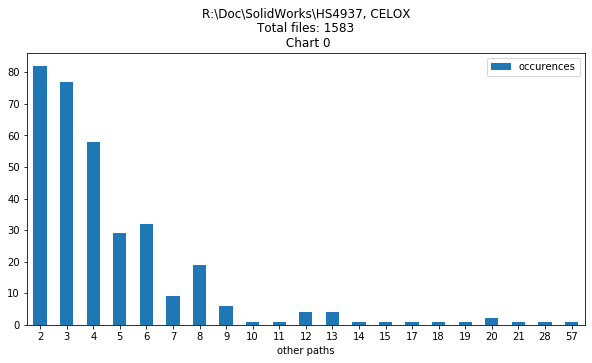

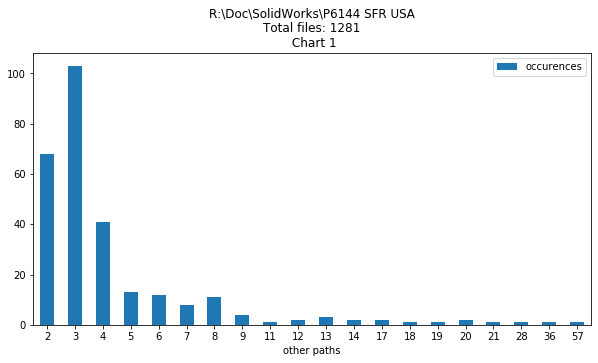

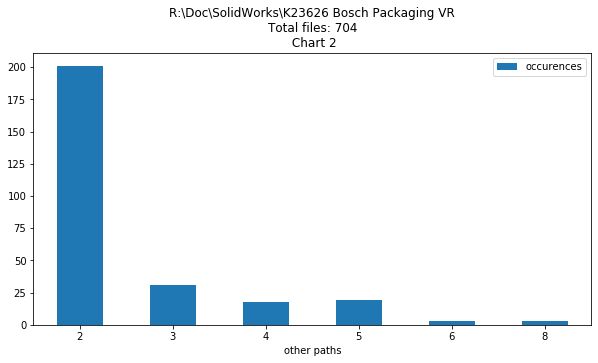

In [28]:
for i in range(len(num_list_list)):
    chart_em(num_list_list[i], occur_list_list[i], i)